<a href="https://colab.research.google.com/github/mnskartik/CodEvo-Solutions-ML/blob/main/EMAILSPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('/content/spam_ham_dataset.csv')

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    return ' '.join(tokens)

In [5]:
data['text'] = data['text'].apply(preprocess_text)

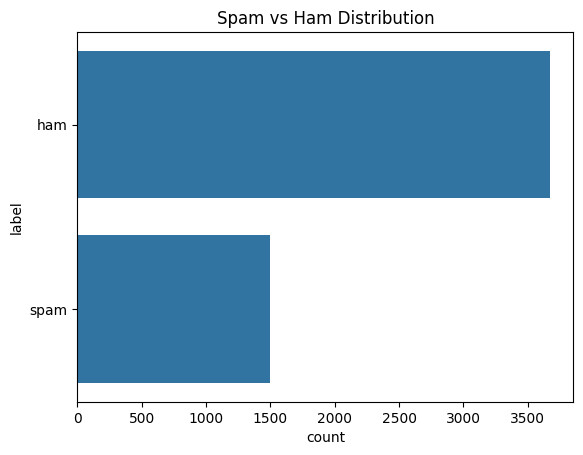

In [6]:
sns.countplot(data['label'])
plt.title('Spam vs Ham Distribution')
plt.show()

In [7]:
spam_words = ' '.join(data[data['label'] == 'spam']['text'])
ham_words = ' '.join(data[data['label'] == 'ham']['text'])


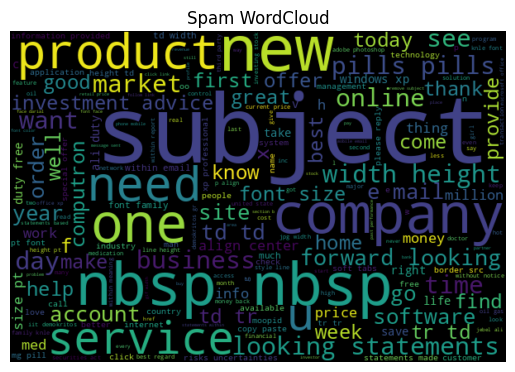

In [8]:
spam_wc = WordCloud(width=600, height=400).generate(spam_words)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam WordCloud')
plt.axis('off')
plt.show()

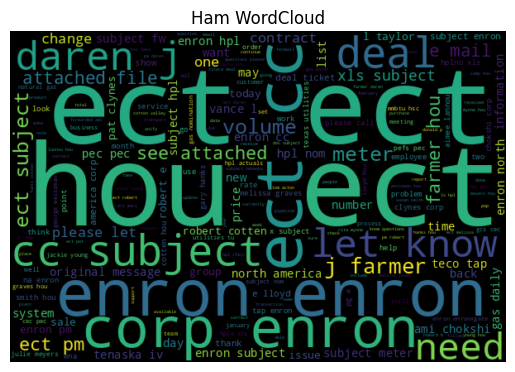

In [9]:
ham_wc = WordCloud(width=600, height=400).generate(ham_words)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham WordCloud')
plt.axis('off')
plt.show()

In [10]:
X = data['text']
y = data['label'].map({'ham': 0, 'spam': 1})  # Map labels to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


In [12]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_vec.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(X_train_vec, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7129 - loss: 0.5842 - val_accuracy: 0.9783 - val_loss: 0.1322
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9809 - loss: 0.0944 - val_accuracy: 0.9879 - val_loss: 0.0427
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9924 - loss: 0.0267 - val_accuracy: 0.9867 - val_loss: 0.0366
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9987 - loss: 0.0113 - val_accuracy: 0.9867 - val_loss: 0.0367
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9993 - loss: 0.0083 - val_accuracy: 0.9891 - val_loss: 0.0378
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9998 - loss: 0.0035 - val_accuracy: 0.9891 - val_loss: 0.0400
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 0.

In [14]:
test_loss, test_accuracy = model.evaluate(X_test_vec, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9840 - loss: 0.0564
Test Accuracy: 0.98


In [15]:
y_pred = model.predict(X_test_vec)
y_pred_classes = (y_pred > 0.5).astype(int)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


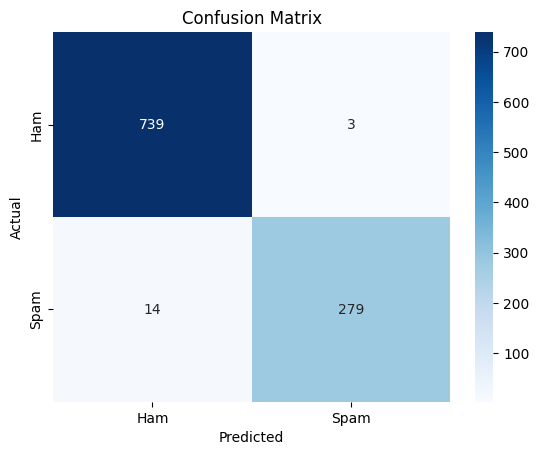

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(classification_report(y_test, y_pred_classes, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       742
        Spam       0.99      0.95      0.97       293

    accuracy                           0.98      1035
   macro avg       0.99      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [18]:

new_emails = ["Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize.",
              "Meeting tomorrow at 10 AM. Please bring the reports."]


new_emails_preprocessed = [preprocess_text(email) for email in new_emails]
new_emails_vec = vectorizer.transform(new_emails_preprocessed).toarray()


new_predictions = model.predict(new_emails_vec)
new_predictions_classes = (new_predictions > 0.5).astype(int)


for i, email in enumerate(new_emails):
    print(f"Email: {email}\nPrediction: {'Spam' if new_predictions_classes[i][0] else 'Ham'}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Email: Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize.
Prediction: Spam

Email: Meeting tomorrow at 10 AM. Please bring the reports.
Prediction: Ham

